In [2]:
import numpy as np
from neurodsp.sim import sim_combined
from neurodsp.spectral import compute_spectrum
from neurodsp.utils.data import create_times
from neurodsp.plts import plot_time_series, plot_power_spectra
# Import IRASA
from neurodsp.aperiodic import compute_irasa, fit_irasa

# IRASA

IRASA stands for irregularly resampled auto-spectral analysis. It assumes the signal model is an aperiodic component, namely a 1/f component, added with finitely many sinusoids. These sinusoids manifest themselves as discrete spikes in the power spectrum. IRASA computes the aperiodic component appealing by appealing to the self-similar nature of signals whose power spectrum obeys a power law. Unlike FOOOF, IRASA requires access to the times series in the time domain. By resampling the time series at non-integer rates, the spikes in the power spectrum corresponding to the sinusoids will be shifted in frequency by a quantity proportional to the resampling rate. However, self-similarity of the aperiodic component ensures that the power law decay remains the same across resamplings. Sinusoids are then averaged out across the power spectra of the resampled time series.

IRASA does not explicitly consider signals with a knee, nor does it consider signals where there are central frequencies with some variance around them as in the setting of FOOOF. Below are some examples which detail the performance on IRASA in various settings.

#### Notes
- IRASA seems to perform well when there are a few sinusoids added to the aperiodic component where the frequencies of those sinusoids are sufficiently different, e.g. well-spaced in the frequency range.
    - When the frequencies are close to one another, IRASA does not perform as well.
- Lower frequency sinusoids also seem to negatively impact IRASA's estimation.
- IRASA's behavior seems to be stable across different values of $\chi \in (-3, 0)$.

### Aperiodic + 1 Sinusoid

Measured exponent: -1.69
Expected exponent: -1.75


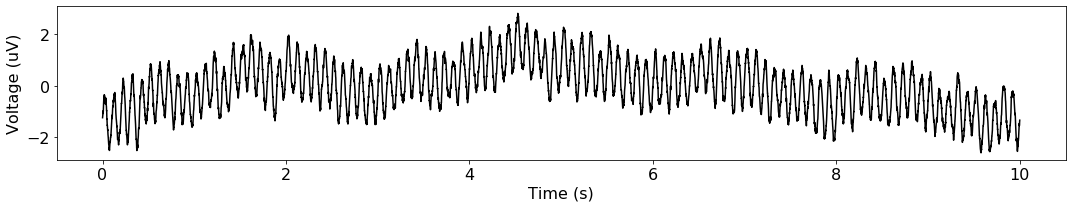

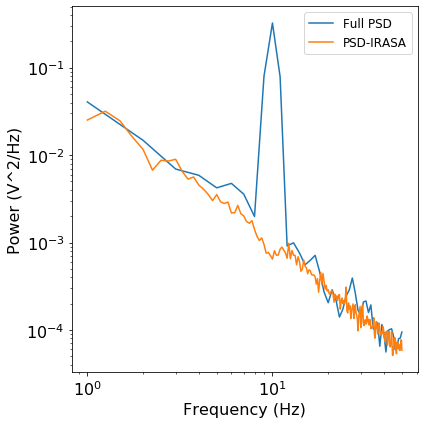

In [52]:
fs = 10**3
n_seconds = 10
times = create_times(n_seconds, fs)
power_law_exp = -1.75

# Set frequency range to analyze
f_range = (1, 50)

# Collect IRASA settings
irasa_params = {'fs' : fs, 'f_range' : f_range}

sim_components = {'sim_powerlaw': {'exponent' : power_law_exp},
                  'sim_oscillation': [{'freq' : 10},]}
sig = sim_combined(n_seconds, fs, sim_components)
plot_time_series(times, sig)

# Calculate IRASA and fit exponent
freqs_irasa, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
fit_off, fit_exp = fit_irasa(freqs_irasa, psd_ap)
freqs_full, psd_full = compute_spectrum(sig, fs, f_range=f_range)

# Compare the full spectrum the IRASA separate aperiodic component
plot_power_spectra([freqs_full, freqs_irasa], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-IRASA'],
             log_freqs=True, log_powers=True)

print(f"Measured exponent: {fit_exp:.2f}")
print(f"Expected exponent: {power_law_exp}")

### Aperiodic + 4 Well-Spaced Sinusoids

IRASA does well with more than one simple oscillatory component provided the frequencies of the sinusoids are sufficiently far apart.

Measured exponent: -3.03
Expected exponent: -2.75


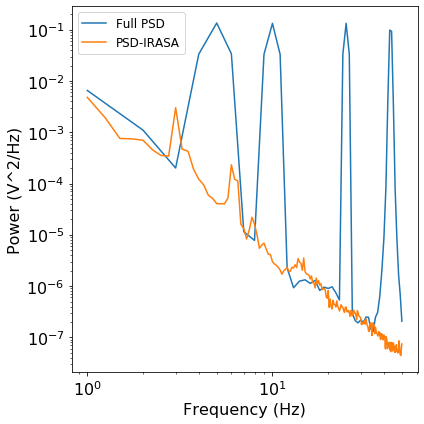

In [21]:
sim_components = {'sim_powerlaw': {'exponent' : power_law_exp},
                  'sim_oscillation': [{'freq' : 5}, 
                                      {'freq' : 10},
                                      {'freq' : 25},
                                      {'freq' : 45}]}

sig = sim_combined(n_seconds, fs, sim_components)

# Calculate IRASA and fit exponent
freqs_irasa, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
fit_off, fit_exp = fit_irasa(freqs_irasa, psd_ap)
freqs_full, psd_full = compute_spectrum(sig, fs, f_range=f_range)

# Compare the full spectrum the IRASA separate aperiodic component
plot_power_spectra([freqs_full, freqs_irasa], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-IRASA'],
             log_freqs=True, log_powers=True)

print(f"Measured exponent: {fit_exp:.2f}")
print(f"Expected exponent: {power_law_exp}")

### Aperiodic + Cluster of Sinusoids

However, IRASA does have difficulties when there are multiple sinusoids whose frequencies are close to one another.

Measured exponent: -3.91
Expected exponent: -2.75


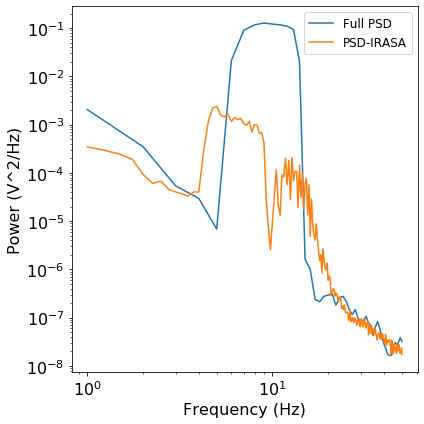

In [32]:
power_law_exp = -2.75
sim_components = {'sim_powerlaw': {'exponent' : power_law_exp},
                  'sim_oscillation': [{'freq' : 7},
                                      {'freq' : 8},
                                      {'freq' : 9},
                                      {'freq' : 10},
                                      {'freq' : 11},
                                      {'freq' : 12},
                                      {'freq' : 13}],
                 }

sig = sim_combined(n_seconds, fs, sim_components)

# Calculate IRASA and fit exponent
freqs_irasa, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
fit_off, fit_exp = fit_irasa(freqs_irasa, psd_ap)
freqs_full, psd_full = compute_spectrum(sig, fs, f_range=f_range)

# Compare the full spectrum the IRASA separate aperiodic component
plot_power_spectra([freqs_full, freqs_irasa], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-IRASA'],
             log_freqs=True, log_powers=True)

print(f"Measured exponent: {fit_exp:.2f}")
print(f"Expected exponent: {power_law_exp}")

### Aperiodic + Low Frequencies

Additionally, IRASA does have trouble when there are low frequencies present.

Measured exponent: -3.82
Expected exponent: -2.75


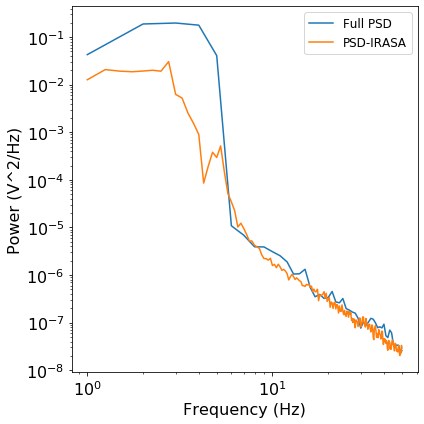

In [44]:
power_law_exp = -2.75
sim_components = {'sim_powerlaw': {'exponent' : power_law_exp},
                  'sim_oscillation': [{'freq' : 2},
                                      {'freq' : 3},
                                      {'freq' : 4},],
                 }

sig = sim_combined(n_seconds, fs, sim_components)

# Calculate IRASA and fit exponent
freqs_irasa, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
fit_off, fit_exp = fit_irasa(freqs_irasa, psd_ap)
freqs_full, psd_full = compute_spectrum(sig, fs, f_range=f_range)

# Compare the full spectrum the IRASA separate aperiodic component
plot_power_spectra([freqs_full, freqs_irasa], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-IRASA'],
             log_freqs=True, log_powers=True)

print(f"Measured exponent: {fit_exp:.2f}")
print(f"Expected exponent: {power_law_exp}")